# Notebook testing and showing usecase of Pypi-Package hapsburg

In [1]:
### Some Code to set right paths on Harald's Machine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path to Package Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

### If wanting to use local version and not  pip installed version
sys.path.append("./package/") # Append local Hapsburg Folder

midway2-0407.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


# Calling ROH
Running the core part of the package, a wrapper for the 
core calling machinery bundled up in hapsburg_run

In [2]:
from hapsburg.PackagesSupport.hapsburg_run import hapsb_ind  # Need this import

### Test calling ROH on single Individual from Freilich2020
Set the location of the reference hdf5 and the target eigenstrat path correctly!
See example below.

logfile=False -> All output is printed into sys.out  
combine=False -> No individual .csv is created from chromosome .csv 

In [ ]:
hapsb_ind(iid="I7966", chs=range(20,21), processes=1, 
          path_targets = "./Data/Sirak20/v421_CaribIllu1000GancSam_bySite_PAM",
          folder_out="./Empirical/Eigenstrat/Sirak20/test/",
          e_model="haploid", p_model="EigenstratPacked", n_ref=2504,
          random_allele=True, readcounts=False,
          delete=False, logfile=False, combine=False)

### Example whole individual with output to logfile
This example runs a whole individual in parallel, with the output send to a logfile

In [6]:
hapsb_ind(iid="17966", chs=range(1,23), processes=6, 
          path_targets = "./Data/Sirak20/v421_CaribIllu1000GancSam_bySite_PAM",
          folder_out="./Empirical/Eigenstrat/Sirak20/test/",
          e_model="haploid", p_model="EigenstratPacked", n_ref=2504,
          random_allele=True, readcounts=False,
          delete=False, logfile=True, combine=True)

Doing Individual 17966...
Running 22 total jobs; 6 in parallel.
Set Output Log path: ./Empirical/Eigenstrat/Sirak20/test/17966/chr3/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Sirak20/test/17966/chr1/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Sirak20/test/17966/chr2/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Sirak20/test/17966/chr4/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Sirak20/test/17966/chr5/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Sirak20/test/17966/chr6/hmm_run_log.txt


IndexError: index 0 is out of bounds for axis 0 with size 0

### Example from Freilich 2020

In [3]:
hapsb_ind(iid="ZEM05", chs=range(13,14), processes=1, 
          path_targets = "./Data/Freilich20/AncCroatia1240KallSNPs",
          h5_path1000g='./Data/1000Genomes/HDF5/1240kHDF5/all1240/chr',
          base_out_folder="./Empirical/Eigenstrat/Freilich20/test/",
          e_model="haploid", p_model="EigenstratUnpacked", n_ref=2504,
          destroy_phase=True, readcounts=False,
          delete=False, logfile=False, combine=False)

Doing Individual ZEM05...
Running 1 total jobs; 1 in parallel.
Using Low-Mem Cython Linear Speed Up.
Loaded Pre Processing Model: EigenstratUnpacked
Loading Individual: ZEM05

Loaded 39018 variants
Loaded 2504 individuals
HDF5 loaded from ./Data/1000Genomes/HDF5/1240kHDF5/all1240/chr13.hdf5
3 Eigenstrat Files with 28 Individuals and 1233013 SNPs

Intersection on Positions: 39018
Nr of Matching Refs: 39018 / 39018
Ref/Alt Matching: 38994 / 39018
Flipped Ref/Alt Matching: 0
Together: 38994 / 39018
2504 / 2504 Individuals included in Reference
Extraction of 5008 Haplotypes complete
Flipping Ref/Alt in target for 0 SNPs...
Reduced to markers called 26917 / 38994
Fraction SNPs covered: 0.6903
Successfully saved to: ./Empirical/Eigenstrat/Freilich20/test/ZEM05/chr13/
Shuffling phase of target...
Successfully loaded Data from: ./Empirical/Eigenstrat/Freilich20/test/ZEM05/chr13/
Loaded Emission Model: haploid
Loaded Transition Model: model
Loaded Post Processing Model: Standard
Minimum Genetic

### Actual Hapsburg Run: Test on 2 (multiple) Individuals from Freilich2020

In [14]:
### Run for 2 Individuals
iids = ["JAG58", "ZEM05"]

for iid in iids:
    print(f"Doing Individual: {iid}")
    hapsb_ind(iid=iid, chs=range(1,23), processes=8, 
              path_targets = "./Data/Freilich20/AncCroatia1240KallSNPs",
              base_out_folder="./Empirical/Eigenstrat/Freilich20/test/",
              e_model="haploid", p_model="EigenstratUnpacked", n_ref=2504,
              destroy_phase=True, readcounts=False,
              delete=False, logfile=True, combine=True)

Doing Individual: JAG58
Doing Individual JAG58...
Running 22 total jobs; 8 in parallel.
Set Output Log path: ./Empirical/Eigenstrat/Freilich20/test/JAG58/chr5/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Freilich20/test/JAG58/chr2/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Freilich20/test/JAG58/chr4/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Freilich20/test/JAG58/chr6/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Freilich20/test/JAG58/chr3/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Freilich20/test/JAG58/chr8/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Freilich20/test/JAG58/chr1/hmm_run_log.txt
Set Output Log path: ./Empirical/Eigenstrat/Freilich20/test/JAG58/chr7/hmm_run_log.txt
Combining Information for 22 Chromosomes...
Run finished successfully!
Doing Individual: ZEM05
Doing Individual ZEM05...
Running 22 total jobs; 8 in parallel.
Set Output Log path: ./Empirical/Eigenstrat/Freilich20/te

### Postprocess Results into one results.csv (copying in Meta Data)
Take indivdiual output .csvs and combine into one big results .csv
Merging of output gaps, and ROH>x cM happens here

In [4]:
from hapsburg.PackagesSupport.pp_individual_roh_csvs import pp_individual_roh

In [5]:
%%time
### Postprocess the two Individuals from above and combine into one results .csv
iids = ["JAG58", "ZEM05"]

df1 = pp_individual_roh(iids, meta_path="./Data/Freilich20/meta_processed.csv", 
                        base_folder="./Empirical/Eigenstrat/Freilich20/test/",
                        save_path="./Empirical/Eigenstrat/Freilich20/test/combined_roh05.csv", 
                        output=False, min_cm=[4, 8, 12, 20], snp_cm=50, 
                        gap=0.5, min_len1=2.0, min_len2=4.0)

Loaded 2 / 28 Individuals from Meta
Saved to: ./Empirical/Eigenstrat/Freilich20/test/combined_roh05.csv
CPU times: user 1.28 s, sys: 8.52 ms, total: 1.29 s
Wall time: 1.4 s


# Test plotting functions to visualize some results
Rule of thumb: savepath="PATH/FILE.pdf" controls where the resulting figure is saved to
Change .pdf and .png for different file formats

### Plot the Posterior along one Chromosome. 
Needs the posterior to be saved,
(so in hapsb_ind use delete=False to keep it)

In [6]:
from hapsburg.figures.plot_posterior import plot_posterior_cm

Successfully loaded Data from: ./Empirical/Eigenstrat/Freilich20/ZEM05/chr13/


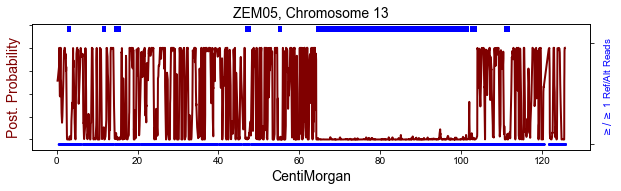

In [7]:
plot_posterior_cm(folder = "./Empirical/Eigenstrat/Freilich20/ZEM05/chr13/", savepath="", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, 
                  readcount=False, figsize=(10,4), title="ZEM05, Chromosome 13"
                  )

### Karyotype Plot
Now plot the whole individual. That only needs the output .csv file

In [8]:
from hapsburg.figures.plot_individual_roh import plot_roh_individual

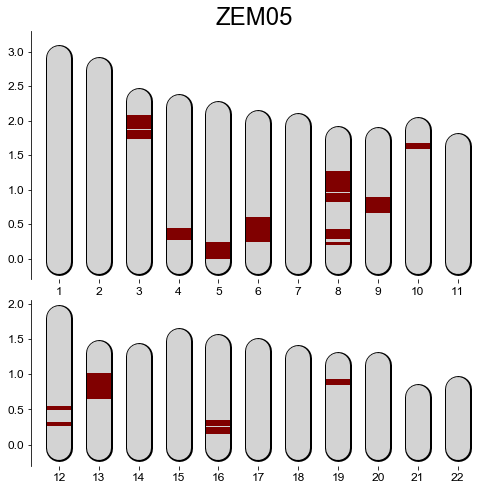

In [9]:
plot_roh_individual(iid="ZEM05", folder="./Empirical/Eigenstrat/Freilich20/test/", 
                    prefix_out="", min_cm=4, plot_bad=False)  # MA89

### Do a histogram of the length distribution and the theoretical expectations

In [10]:
from hapsburg.figures.plot_individual_roh import plot_pde_indivdiual

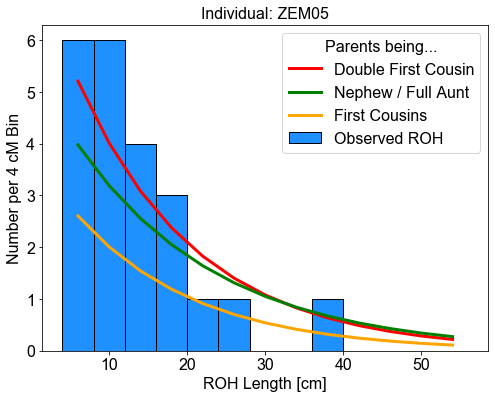

In [11]:
plot_pde_indivdiual(iid="ZEM05", min_cm=3, bw_cm=4, kde_plot=False, plotlim=[4, 60], prefix_out="",
                    savepath="", folder="./Empirical/Eigenstrat/Freilich20/test//")

### Do barplots of ROH distributions

In [12]:
from hapsburg.figures.plot_bars import plot_legend_only, plot_panel_row, prepare_dfs_plot

### First make only purely theoretical Expectations.
(Which expectations can be changed via function parameter values in plot_legend_only)

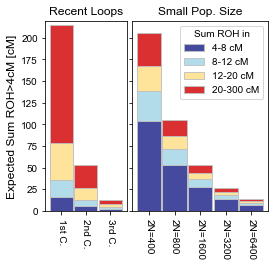

In [13]:
plot_legend_only(savepath="", figsize=(4,3.5))

### Now plot an empirical dataset. 
prepare_dfs_plot prepared from the combined csv (splitting it up into a list of dfs per group)

plot_panel_row then plots these data frames  

In this simple usecase, the two individuals analyzed above (from two different populations) are plotted, together with a legend to the right.

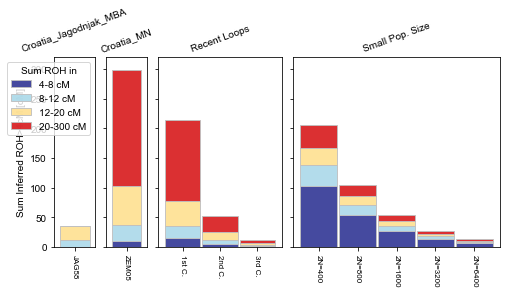

In [14]:
df1 = pd.read_csv("./Empirical/Eigenstrat/Freilich20/test/combined_roh05.csv", sep='\t')
plot_dfs, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

# ./figures_test/freilich20_bars.pdf
plot_panel_row(plot_dfs, savepath="", wspace=0.1, r_title=20, leg_pos=-2, 
               ylim=[0,320], figsize=(8,3.5))

### Plot Timelines
Take the output (with lat/lon/age) and plot 4-8 cM on a Map

In [15]:
from hapsburg.figures.plot_timelines import plot_map_time, extract_pop, prep_label

Initial: 1**2 * RBF(length_scale=1e+03) + WhiteKernel(noise_level=2)
Optimum: 3.22**2 * RBF(length_scale=1.5e+03) + WhiteKernel(noise_level=2.28)
Log-Marginal-Likelihood: -162.4579232263867


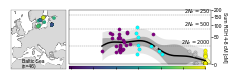

In [16]:
pop = "Baltic Sea"
df1 = pd.read_csv("./Empirical/roh_all_inds.csv", sep="\t")
df_t = extract_pop(df1, age_range=[0,12200], pop=pop) # Cut out the right samples
label = prep_label(df_t, pop)

plot_map_time(df_t, figsize=(3.6 , 1.1), crs_m=[28, 63, -11, 38], 
              width_ratios=(8, 20), height_ratios=[15, 1], hspace=0.06, wspace=0.015,
              s_tl=12, ec="k", lw=0.09, x_lim_tl=[-500, 12200], vrange_m=[0,12200], 
              y_lim_tl=[0,200], fsl=5, fs=5, fs_leg=5, leg_loc_tl="", title_tl="",
              map_title=label, title_loc=(0.2,0.01), cm=4, cm1=8, frac=0, 
              lgth_s=[1500,1500], bottomrow=False, rightcol=True, lw_fit=1.5, 
              ticks=[158.74, 83.82, 21.84], tick_l=[f"$2N_e=250$", f"$2N_e=500$", f"$2N_e=2000$"], 
              width_t=0.6, length_t=2, lbl_pad_time=5, lbl_pad_age=0, xl_pad=1.5, yl_pad=1, 
              widths=800, alpha_vio=0.4, savepath="")